# Confidence Intrevals

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Example using built-in dataset "faithful"

In [2]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


## Plot Relatioship between Eruption time and Waiting time
- Add a 95% Confidence Interval

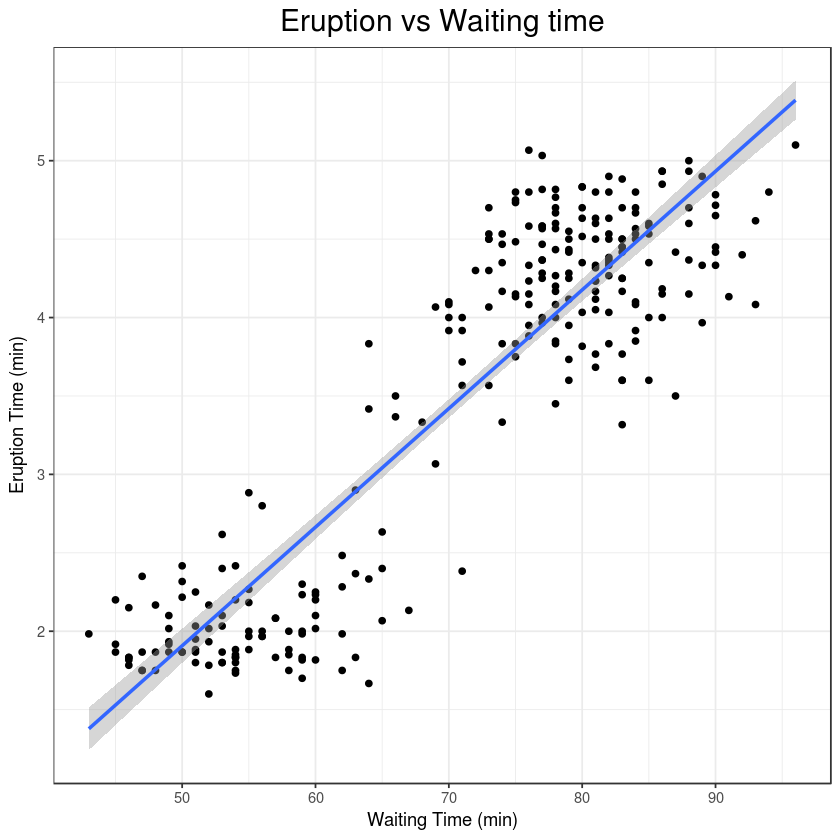

In [3]:
faithful %>%
  ggplot(aes(x = waiting, y = eruptions)) +
  geom_point() +
  geom_smooth(method = 'lm', level = 0.95) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18)) +
  ggtitle("Eruption vs Waiting time") +
  xlab("Waiting Time (min)") +
  ylab("Eruption Time (min)")

## Build a Linear Model
- Look at Confidence Intervals at 95% Confidence

In [7]:
model <- lm(eruptions ~ waiting, data = faithful)
summary(model)


Call:
lm(formula = eruptions ~ waiting, data = faithful)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29917 -0.37689  0.03508  0.34909  1.19329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.874016   0.160143  -11.70   <2e-16 ***
waiting      0.075628   0.002219   34.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4965 on 270 degrees of freedom
Multiple R-squared:  0.8115,	Adjusted R-squared:  0.8108 
F-statistic:  1162 on 1 and 270 DF,  p-value: < 2.2e-16


In [8]:
# Look at 95% Confidence Interval
ci <- confint(model, level = 0.95)
ci

,2.5 %,97.5 %
(Intercept),-2.18930436,-1.55872761
waiting,0.07126011,0.07999579


## Compute Eruption time based on a 50 minute Waiting time
- 95% Confidence Interval

In [9]:
lower_est <- ci[1] + ci[2]*50
upper_est <- ci[3] + ci[4]*50

paste("Eruption Time is between", round(lower_est, 2), "and", round(upper_est, 2), "minutes")

[1] "Eruption Time is between 1.37 and 2.44 minutes"